## KMeans Example Usage

In [1]:
from KMeans import KMeans

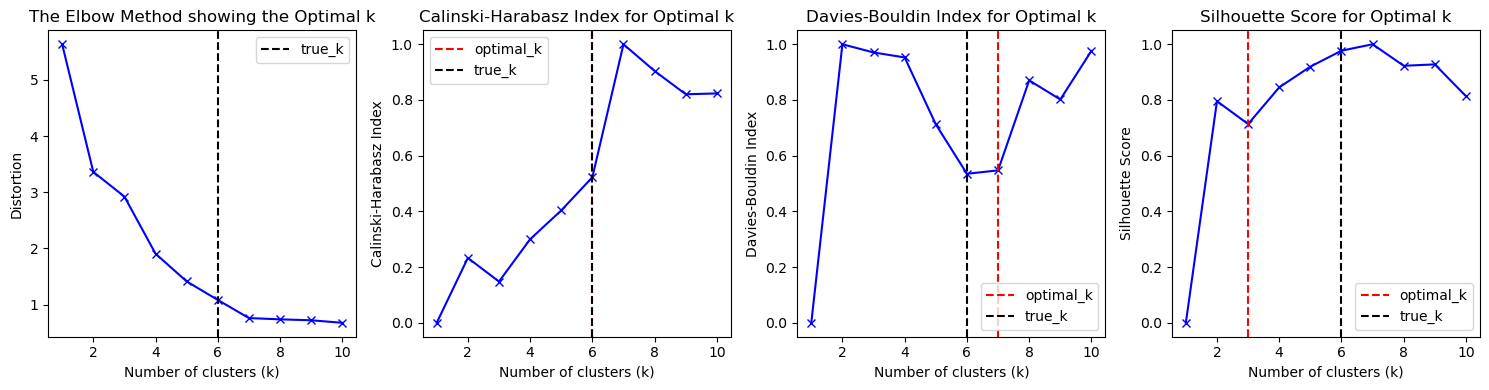

calinski_harabasz_index number of clusters: 6
davies_bouldin_index number of clusters: 7
silhouette_score number of clusters: 3


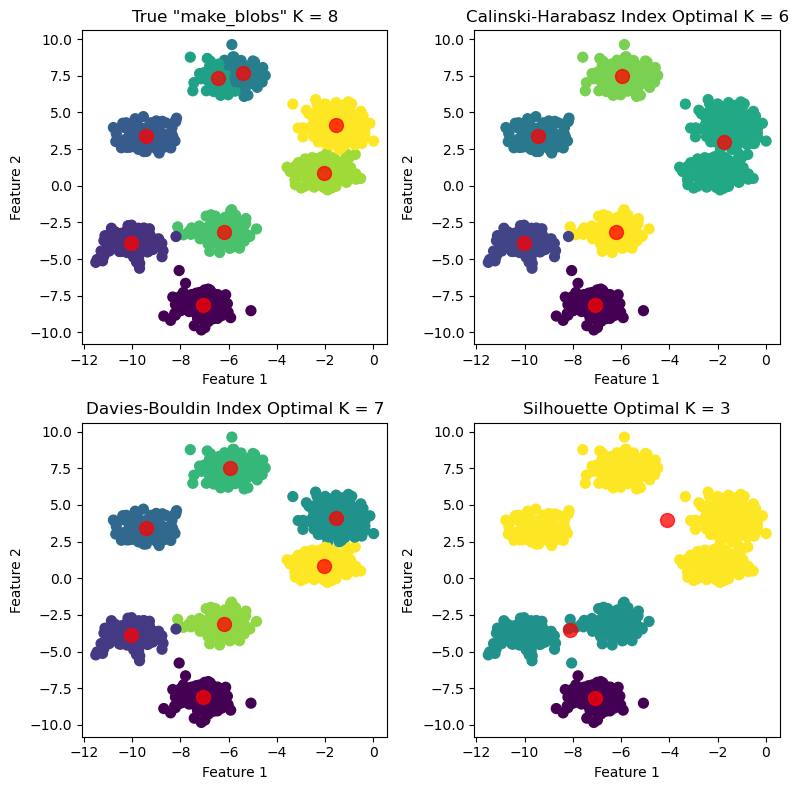

In [2]:
# Example usage:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

true_k = 8
# Generate synthetic data for testing
X, y = make_blobs(n_samples=1000, n_features=2, centers=true_k, cluster_std=0.60, random_state=1)

# Initialize KMeans object
kmeans = KMeans()

# Find the optimal number of clusters using the elbow method
ch_optimal_k, db_optimal_k, silhouette_optimal_k = kmeans.find_optimal_clusters(X, max_k=10)

print(f'calinski_harabasz_index number of clusters: {ch_optimal_k}')
print(f'davies_bouldin_index number of clusters: {db_optimal_k}')
print(f'silhouette_score number of clusters: {silhouette_optimal_k}')

# Create a 2x2 subplot for each k value
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

# Define titles based on which k value method was used
titles = [f'True "make_blobs" K = {true_k}', 
          f'Calinski-Harabasz Index Optimal K = {ch_optimal_k}', 
          f'Davies-Bouldin Index Optimal K = {db_optimal_k}', 
          f'Silhouette Optimal K = {silhouette_optimal_k}']

# Loop through each k value and plot the results of fit()
for i, k in enumerate([true_k, ch_optimal_k, db_optimal_k, silhouette_optimal_k]):
    # Fit the KMeans model with the current k value
    kmeans.n_clusters = k
    kmeans.fit(X)

    # Predict cluster labels
    labels = kmeans.predict(X)

    # Plot the results in the corresponding subplot
    row = i // 2
    col = i % 2
    axs[row, col].scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    centroids = kmeans.centroids
    axs[row, col].scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=0.75)
    axs[row, col].set_title(titles[i])
    axs[row, col].set_xlabel('Feature 1')
    axs[row, col].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()
